In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [6]:
#Reading the files
train_Data = pd.read_csv("C:\\Users\\hp\\Desktop\\train.csv")
testData = pd.read_csv("C:\\Users\\hp\\Desktop\\test.csv")


In [7]:
train_Data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [8]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [9]:
print("Train :",train_Data.shape)
print("Test :",test_Data.shape)

Train : (137, 43)
Test : (100000, 42)


# PRE-PROCESSING & SOME ANALYSIS 

In [10]:
#Get column with null values
train_Data.columns[train_Data.isna().any()].tolist()

[]

In [11]:
train_Data['Open Date'] = pd.to_datetime(trainData['Open Date'], format= '%m/%d/%Y')
train_Data['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2020'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format= '%m/%d/%Y' )
dateLastTrain.head()

train_Data['OpenDays'] = dateLastTrain['Date'] - train_Data['Open Date']
train_Data['OpenDays'] = train_Data['OpenDays'].astype('timedelta64[D]').astype(int)

In [12]:
train_Data.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,7473
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,4339
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2489
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2890
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3889


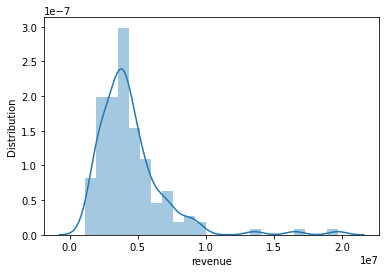

In [13]:
sns.distplot(train_Data['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='Distribution');

NameError: name 'num_col' is not defined

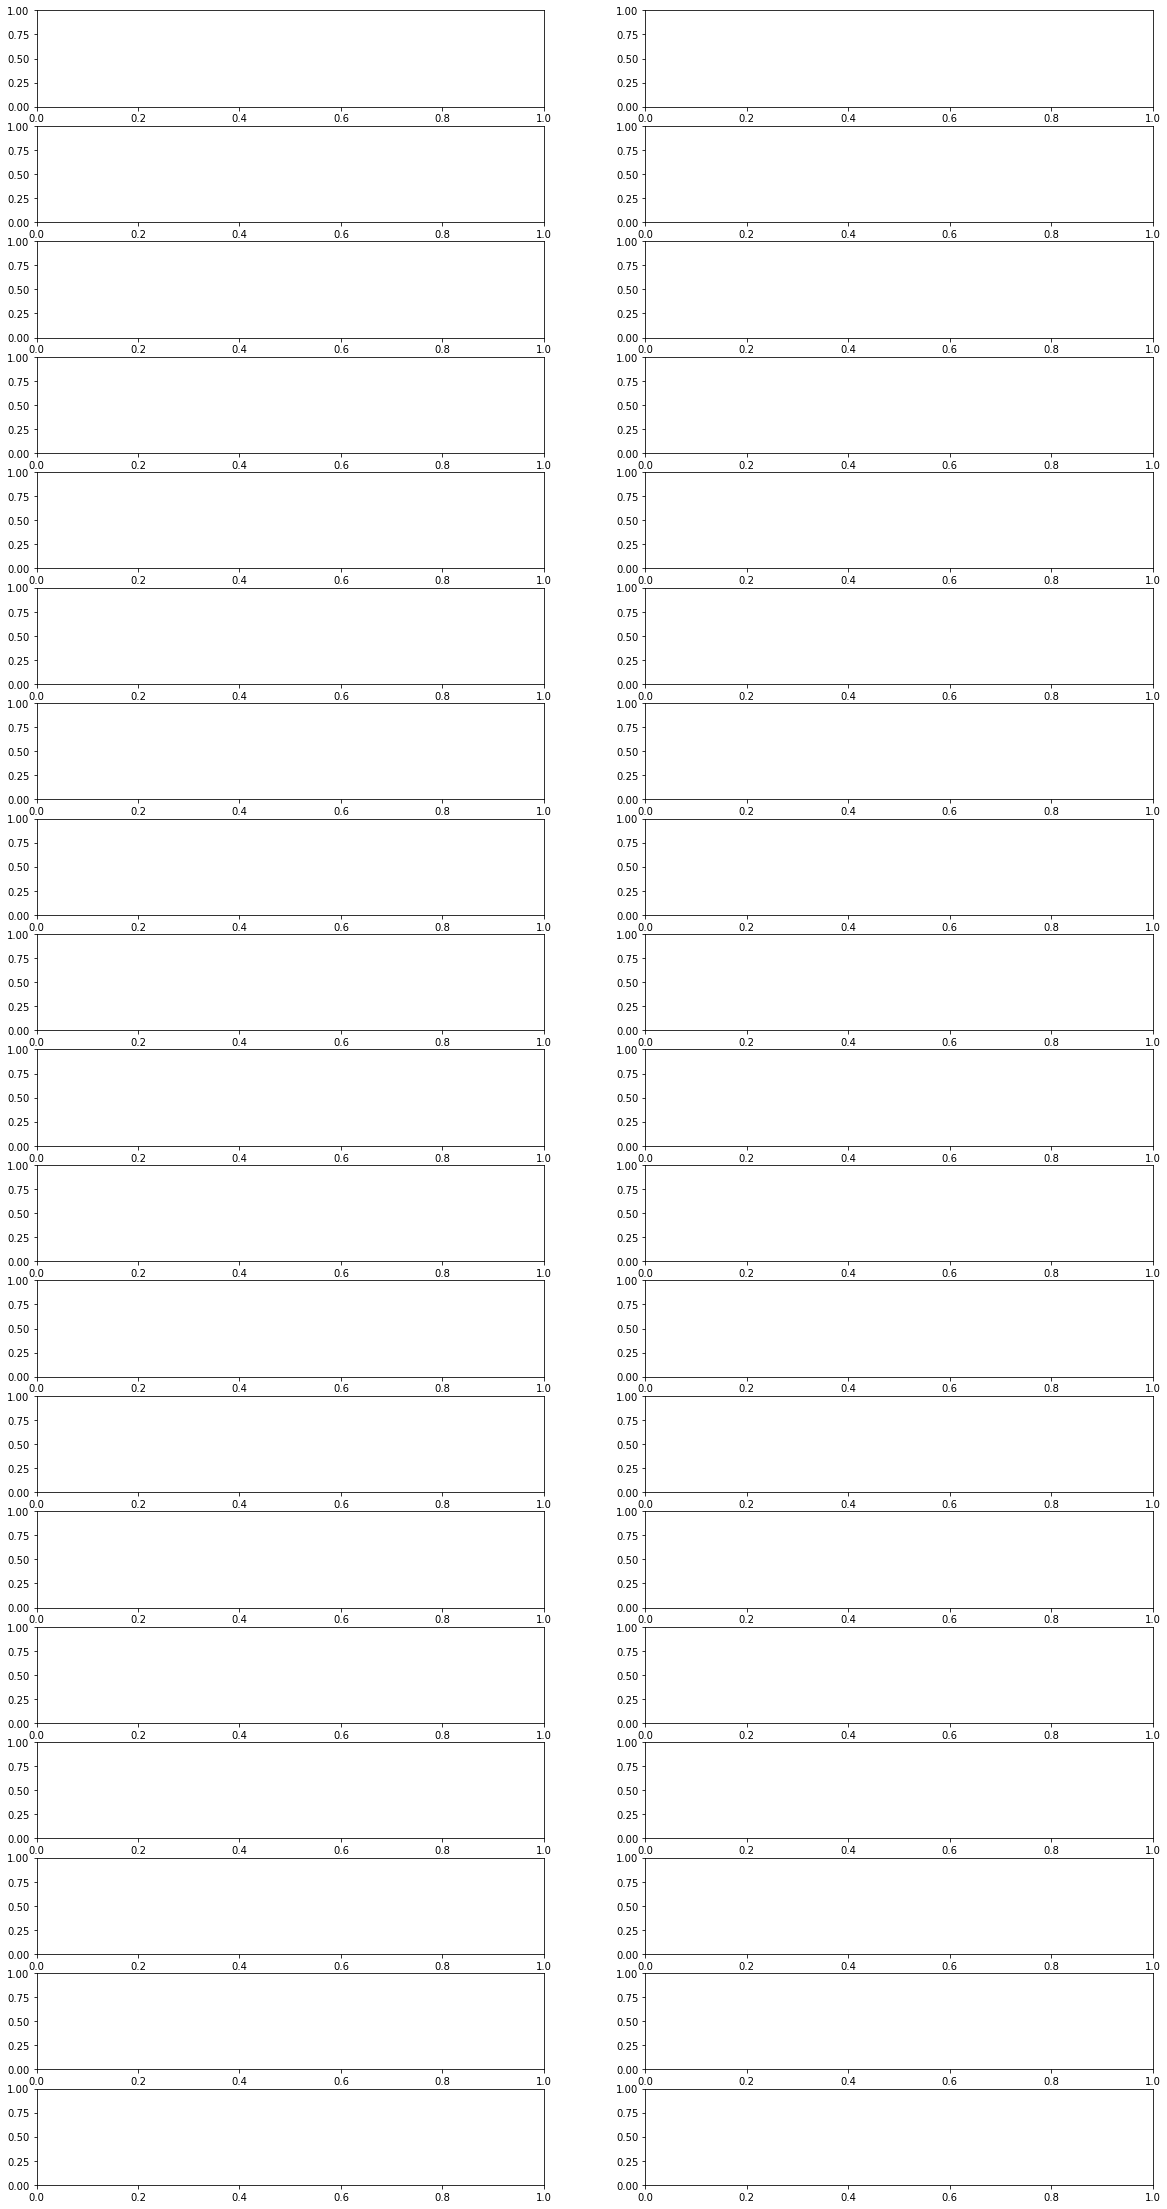

In [14]:
fig, axes = plt.subplots(nrows=19,ncols=2, figsize=(20,40))
axes = axes.flatten()
for index,col in enumerate(num_col[1:]):
    sns.distplot(train_Data[col],ax=axes[index],kde_kws={'cumulative':True, 'bw':1.5},kde=False);

In [15]:
train_Data['revenue'].max()

19696939.0

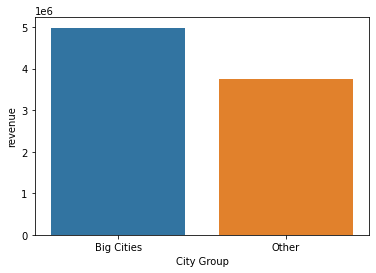

In [18]:
cityPerc = train_Data[['City Group', 'revenue']].groupby(['City Group'],as_index=False).mean()
sns.barplot(x= 'City Group', y='revenue', data=cityPerc)


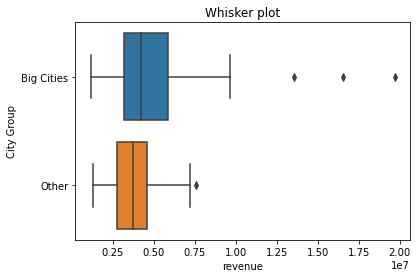

In [19]:
#Revenue of big cities and other cities
ax_wp_1 = sns.boxplot(x='revenue', y='City Group', data=train_Data)
ax_wp_1.set(title='Whisker plot');

bc_mean = train_Data[trainData['City Group'] == 'Big Cities']['revenue'].mean()
oc_mean = train_Data[trainData['City Group'] == 'Other']['revenue'].mean()


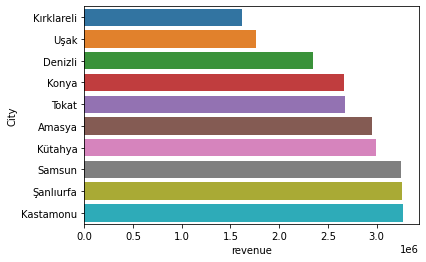

In [21]:
cityPerc = train_Data[['City','revenue']].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'],ascending= True)
sns.barplot(x='revenue', y='City', data=newDF.head(10))


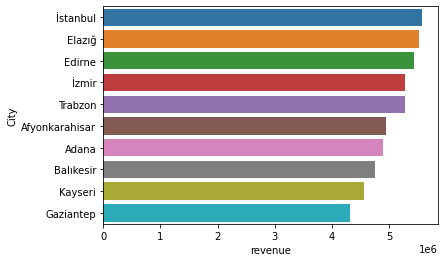

In [22]:
cityPerc = train_Data[['City','revenue']].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'],ascending= False)
sns.barplot(x='revenue', y='City', data=newDF.head(10))

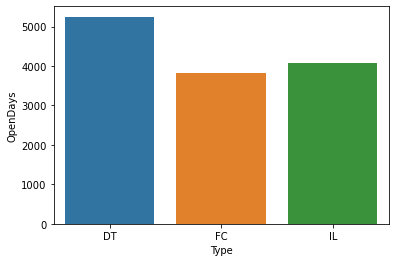

In [23]:
cityPerc = train_Data[['Type','OpenDays']].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='OpenDays', data=cityPerc)

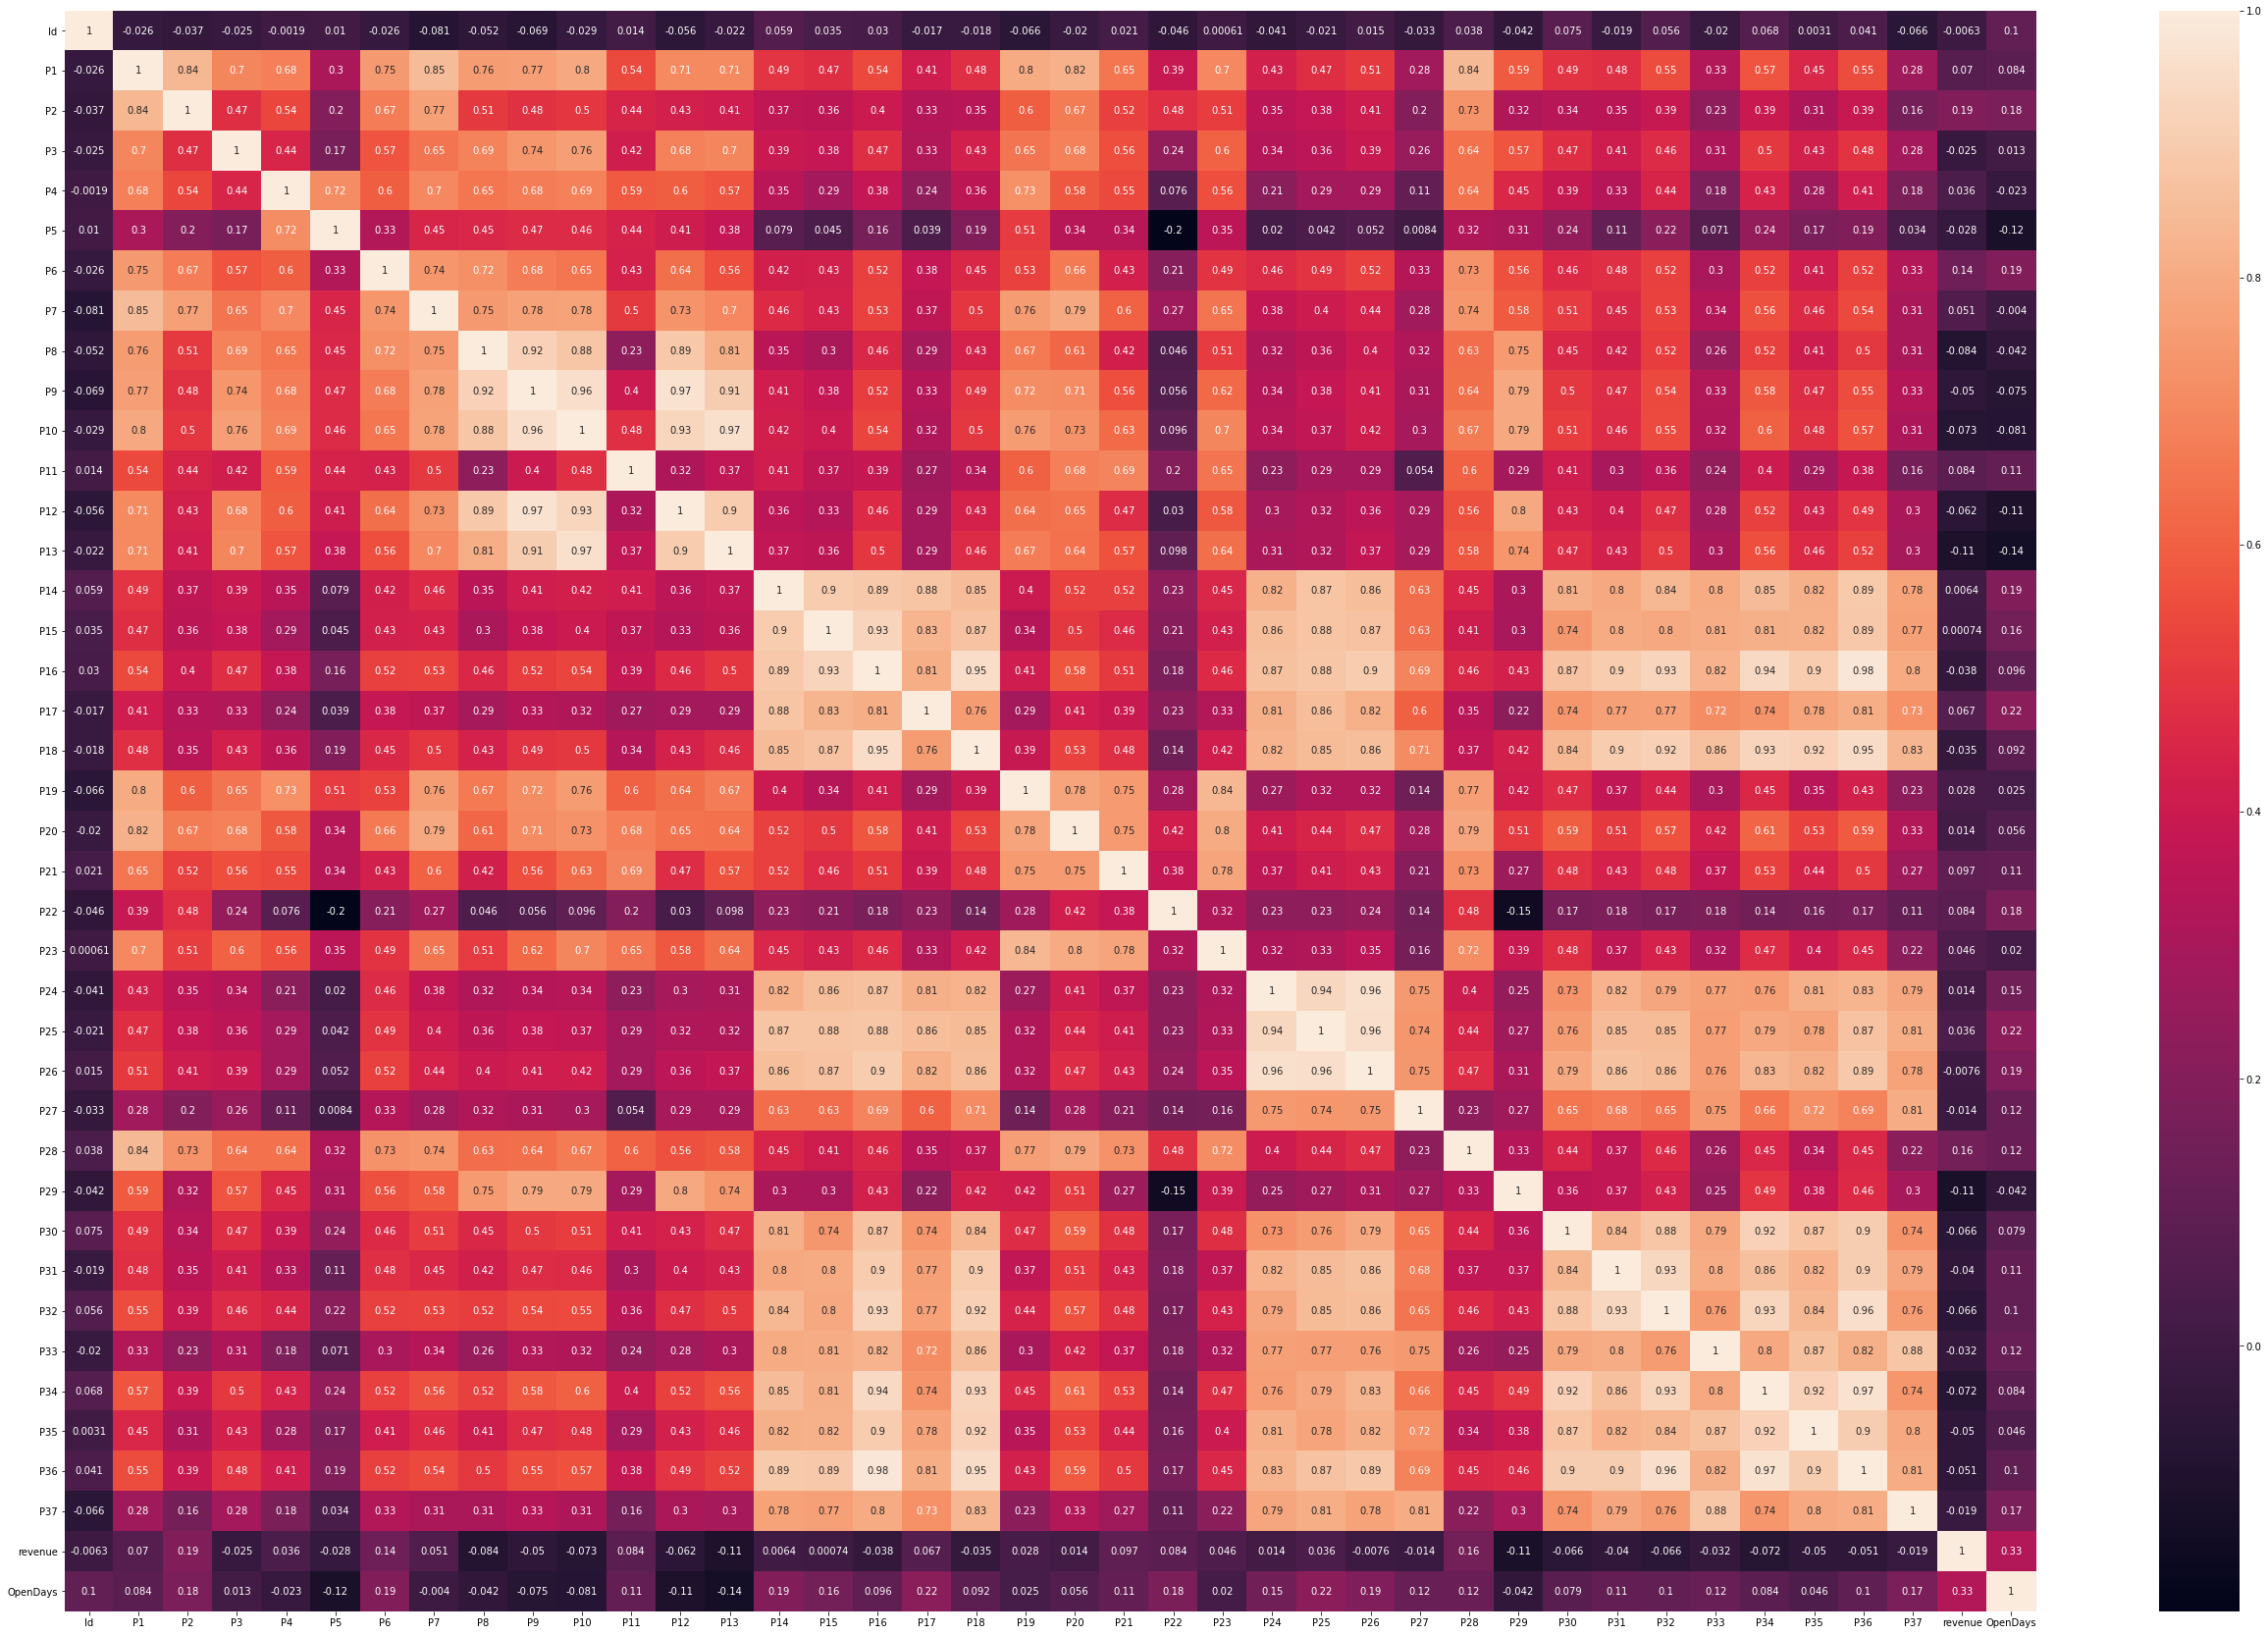

In [26]:
#Correlation 
plt.figure(figsize=(45,30))
sns.heatmap(train_Data.corr(), annot=True);

In [27]:
train_Data = train_Data.drop('Id', axis=1)
train_Data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,7473
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,4339
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,2489
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511.0,2890
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715.0,3889


In [28]:
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
import numpy
xTrain = pd.DataFrame({'OpenDays':train_Data['OpenDays'].apply(numpy.log),
                      'Big Cities':train_Data['Big Cities'],'Other':train_Data['Other'],
                      'P1':train_Data['P1'],'P2':train_Data['P2'],'P4':train_Data['P4'],
                      'P6':train_Data['P6'],'P7':train_Data['P7'],'P11':train_Data['P11'],
                      'P14':train_Data['P14'],'P15':train_Data['P15'],
                      'P17':train_Data['P17'],'P19':train_Data['P19'],'P20':train_Data['P20'],
                      'P21':train_Data['P21'],'P22':train_Data['P22'],'P23':train_Data['P23'],
                      'P24':train_Data['P24'],'P25':train_Data['P25'],'P28':train_Data['P28']})

KeyError: 'Big Cities'

In [30]:
yTrain = train_Data['revenue'].apply(numpy.log)

In [31]:
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                       'Big Cities':testData['Big Cities'],'Other':testData['Other'],
                      'P1':testData['P1'],'P2':testData['P2'],'P7':testData['P7'],
                      'P4':testData['P4'],'P6':testData['P6'],
                      'P11':testData['P11'],'P14':testData['P14'],'P15':testData['P15'],
                      'P17':testData['P17'],'P25':testData['P25'],'P24':testData['P24'],
                      'P19':testData['P19'],'P20':testData['P20'],'P21':testData['P21'], 
                      'P22':testData['P22'],'P23':testData['P23'],'P28':testData['P28']})

KeyError: 'OpenDays'

In [32]:
#Standard scaling for model efficiency

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std = True ,with_mean = True, copy = True)
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)


NameError: name 'xTrain' is not defined

In [34]:
#We are training the model with RandomForestRegressor
forest = RandomForestRegressor(n_estimators=150)
forest.fit(xTrain, yTrain)

NameError: name 'xTrain' is not defined

In [ ]:
pred = forest.predict(xTest)
pred = numpy.exp(pred)
scoreOfModel=forest.score(xTrain, yTrain)
print("Score is calculated as: ",scoreOfModel)

In [ ]:
pred = forest.predict(xTest)
pred = numpy.exp(pred)

In [ ]:
pred

In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost as xgb


In [ ]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,
                 reg_alpha=0.75,
                 subsample=0.6,
                 seed=42)
xgbr=best_xgb_model.fit(xTrain, yTrain)

In [ ]:
xgbrscoreofModel=xgbr.score(xTrain, yTrain)
print("Score is calculated as: ",xgbrscoreofModel)